In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('../data/obesity_dataset.csv')
data.head()

,Height,Age,Meals_Per_Day,Frequency_Physical_Activity,Water_Intake,Vegetable_Intake,Technology_Use,Weight,Food_Between_Meals,Mode_Transportation,Alcohol_Intake,SMOKE,family_history_with_overweight,High_Caloric_Food,Monitor_Calories,Gender,Obesity_Level,Obese/Overweight
0,1.62,21.0,3.0,0.0,2.0,2.0,1.0,64.0,Sometimes,Public_Transportation,no,no,yes,no,no,Female,Normal_Weight,No
1,1.52,21.0,3.0,3.0,3.0,3.0,0.0,56.0,Sometimes,Public_Transportation,Sometimes,yes,yes,no,yes,Female,Normal_Weight,No
2,1.80,23.0,3.0,2.0,2.0,2.0,1.0,77.0,Sometimes,Public_Transportation,Frequently,no,yes,no,no,Male,Normal_Weight,No
3,1.80,27.0,3.0,2.0,2.0,3.0,0.0,87.0,Sometimes,Walking,Frequently,no,no,no,no,Male,Overweight_Level_I,Yes
4,1.78,22.0,1.0,0.0,2.0,2.0,0.0,89.8,Sometimes,Public_Transportation,Sometimes,no,no,no,no,Male,Overweight_Level_II,Yes


In [4]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [5]:
# Define features (X) and target (y), excluding 'Obesity_Level'
X = data.drop(columns=['Weight', 'Obese/Overweight', 'Obesity_Level'])
y = data['Obese/Overweight']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending = True)

In [9]:
# Display feature importance
print(feature_importances)

                           Feature  Importance
10                           SMOKE    0.005017
13                Monitor_Calories    0.015747
14                          Gender    0.022262
12               High_Caloric_Food    0.023310
9                   Alcohol_Intake    0.028763
8              Mode_Transportation    0.040846
5                 Vegetable_Intake    0.043423
4                     Water_Intake    0.060245
2                    Meals_Per_Day    0.064420
6                   Technology_Use    0.068598
3      Frequency_Physical_Activity    0.084680
0                           Height    0.087969
11  family_history_with_overweight    0.132402
1                              Age    0.156754
7               Food_Between_Meals    0.165562


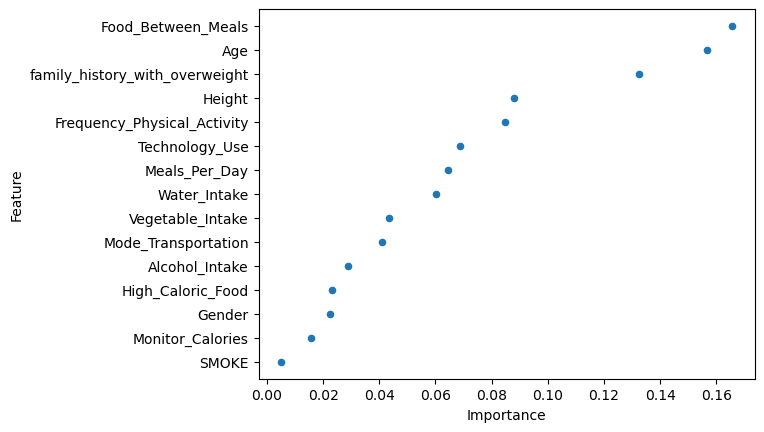

In [11]:
feature_importances.plot.scatter(x = 'Importance', y = 'Feature')
plt.savefig('../outputs/random_forest_feature_importance.png', bbox_inches = 'tight', dpi = 300)
plt.show()